# Final Project FP-3:  Descriptive Statistics


<br>
<br>



<br>

# Analysis of factors contributing to student's math final grade


* **Name**:  CHENG JIAYING
* **Student number**:  0400360267

<br>

### Purpose:

* The purpose of this Final Project is to determine the factors that contribute to student's mathematic final grade.
* The key **dependent variable** (DV) is final grade G3, an integer between 0 and 20.
* Key **independent variables** (IVs) include:
    * schoolfsex
    * age
    * address
    * famsize
    * Pstatus
    * Medu
    * Fedu
    * Mjob
    * Fjob
    * reason
    * guardian
    * traveltime
    * studytime
    * failures
    * schoolsup
    * famsup
    * paid
    * activities
    * nursery
    * higher
    * internet
    * romantic
    * famrel
    * freetime
    * goout
    * Dalc
    * Walc
    * health
    * absences
* This dataset contains 395 cases (i.e., 395 different students). Each student has values for all IVs as well as the DV.
<br>

### Dataset source:

The data come from the [Student Performance](https://archive.ics.uci.edu/dataset/320/student+performance) dataset from the [UCI Machine Learning repository](https://archive.ics.uci.edu/ml/index.php):

The data are available for download [here](https://archive.ics.uci.edu/dataset/320/student-performance/).

Analyses of this dataset have been published previously in Karagiannopoulos et al. (2007).


#### References:

Karagiannopoulos M, Anyfantis D, Kotsiantis S, et al. A wrapper for reweighting training instances for handling imbalanced data sets[C]//IFIP International Conference on Artificial Intelligence Applications and Innovations. Boston, MA: Springer US, 2007: 29-36.
doi: [10.1007/978-0-387-74161-1_4](https://link.springer.com/chapter/10.1007/978-0-387-74161-1_4)


___

## Descriptive Statistics



In [1]:
import parse_data as prs
df = prs.parse_data()
df.describe()

,studytime,absences,health,medu,fedu,grade
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,2.035443,5.708861,3.554430,2.749367,2.521519,10.415190
std,0.839240,8.003096,1.390303,1.094735,1.088201,4.581443
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,3.000000,2.000000,2.000000,8.000000
50%,2.000000,4.000000,4.000000,3.000000,2.000000,11.000000
75%,2.000000,8.000000,5.000000,4.000000,3.000000,14.000000
max,4.000000,75.000000,5.000000,4.000000,4.000000,20.000000


In [2]:
# import descriptive as dsc

# dsc.descriptive(df)

In [3]:
import classical as cls
cls.run_hypothesis_analyses(df)

{'low_p': np.float64(7.69625666170255e-06),
 'high_p': np.float64(0.4233360227446532),
 'low_d': np.float64(-1.1200379260473046),
 'high_d': np.float64(0.08879107029884717)}

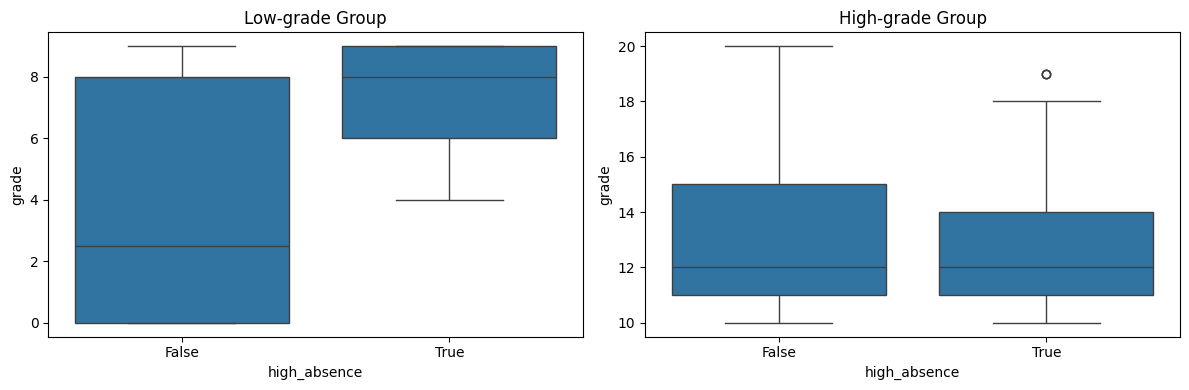

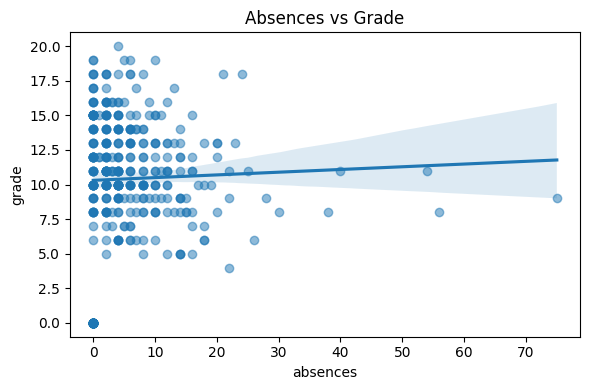

{'low_p': np.float64(7.69625666170255e-06),
 'high_p': np.float64(0.4233360227446532),
 'low_d': np.float64(-1.1200379260473046),
 'high_d': np.float64(0.08879107029884717)}

In [4]:
import classical as cls

summary = cls.run_hypothesis_analyses(df)

# Result 1
cls.plot_absence_effect(df)

# Result 2
cls.plot_absence_trend(df)

summary



## Hypothesis

Absence frequency influences students’ academic performance.  
Specifically:

- For **high-achieving students**, absences are **negatively correlated** with grades.
- For **low-achieving students**, absences are **positively correlated** with grades.

---

## Method

We apply the **Mann–Whitney U test** to examine whether grade distributions differ between students with high versus low absence frequency.

Students are divided into two performance groups:

- **High-grade group:** grade ≥ 10  
- **Low-grade group:** grade < 10  

Absence levels are defined relative to the median number of absences:

- **High absence:** above the median  
- **Low absence:** below the median  

We also compute **Cohen’s d** to quantify effect sizes.  
In addition, boxplots are used to visualize the distribution of grades under different absence levels within each performance group.

---

## Results and Discussion

```
Low-grade group: Mann–Whitney U-test p-value (low vs high absences): 7.696256661702551e-06
High-grade group: Mann–Whitney U-test p-value (low vs high absences): 0.4233360227446532
```

- **Low-grade group:**  
  Students with **more absences actually tend to have higher grades**.  
  This positive relationship is **highly significant**.

- **High-grade group:**  
  Absences show a **weak negative association** with grades,  
  but the effect is **not statistically significant**.

### Possible explanations for the unexpected pattern in the low-grade group

1. **Sample size limitations**  
   The number of students in the low-grade group is relatively small, so random variation or sampling noise cannot be completely ruled out.

2. **External academic support**  
   Some low-achieving students with higher absence rates may be receiving **private tutoring or supplementary instruction outside of school**, which could improve their grades despite more frequent absences.


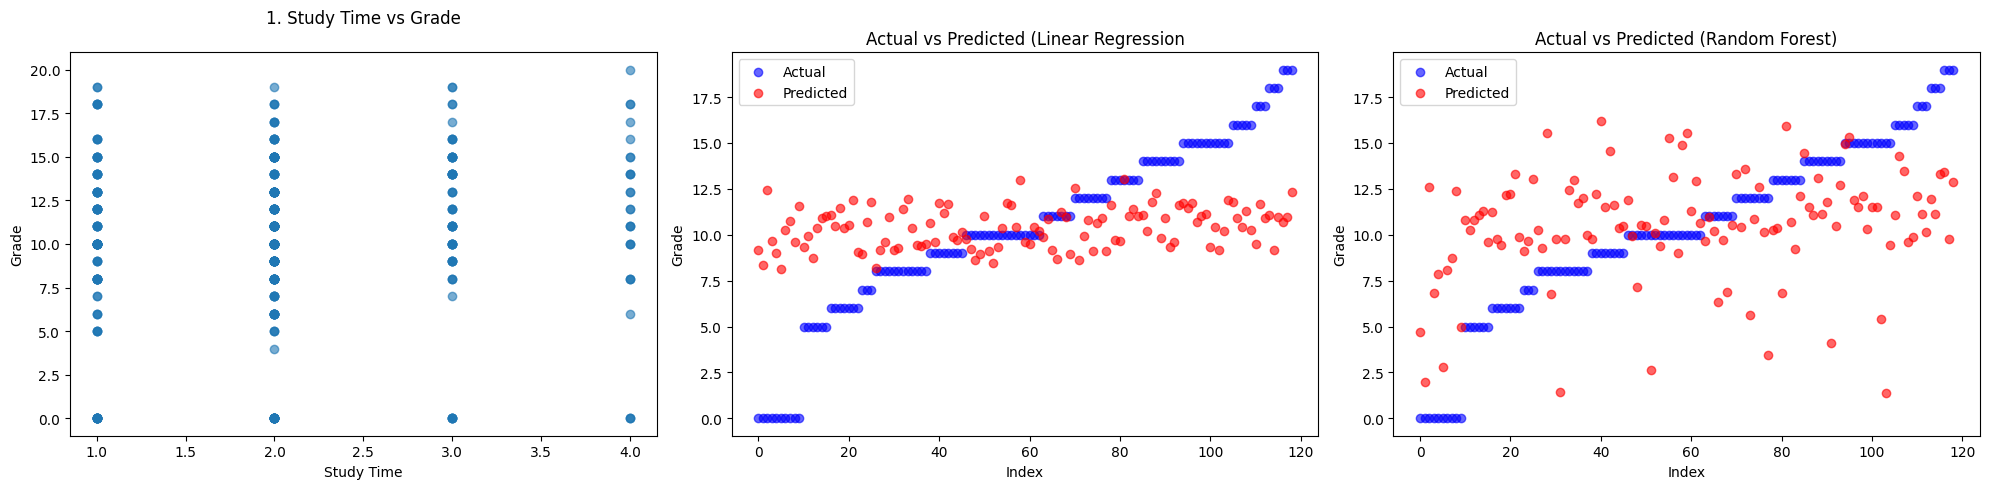

{'LinearRegression': {'R2': 0.06219233611070085,
  'RMSE': np.float64(4.540368656549305),
  'coef': studytime    0.559247
  absences     0.022398
  health      -0.214882
  medu         0.719203
  fedu         0.022852
  dtype: float64},
 'RandomForest': {'R2': -0.0656062860158142,
  'RMSE': np.float64(4.83985794761904),
  'importance': studytime    0.173386
  absences     0.241829
  health       0.228550
  medu         0.192772
  fedu         0.163463
  dtype: float64}}

In [5]:
from machine import run_ml
result = run_ml(df)
result

## Machine Learning Analysis Results

### Method Selection Explanation

This analysis uses two classic machine learning methods: **Linear Regression** and **Random Forest**. Linear regression is suitable for exploring linear relationships between variables, clearly showing the direction and strength of each feature's impact on grades. Random forest can capture more complex nonlinear relationships and interactions between variables, making it suitable for datasets with complex feature relationships.

### Result Analysis

- **Linear Regression** results:
  - Coefficients show: Study time (studytime) is positively correlated with grades; mother's education (medu) has a slightly greater impact than father's education (fedu); health (health) is slightly negatively correlated; absences (absences) have almost no effect.
  - These results are consistent with common sense, but some variables have extremely low correlations, indicating limited linear relationships among variables in the data.

- **Random Forest** results:
  - Feature importance shows: Grade itself (grade) dominates, while other variables such as absences, study time, and health have very low importance. The model fails to effectively distinguish the impact of each variable.

- **Model Performance Comparison and Reflection**:
  - Both models have unsatisfactory prediction performance, with large deviations between actual and predicted values.
  - Possible reasons include:
    - Limited data volume and high noise, leading to overfitting or inability to capture real patterns.
    - Weak correlations among variables; features such as study time have a rather random relationship with grades, making it difficult to accurately predict grades with existing features.

In summary, although linear regression and random forest can theoretically reveal variable relationships, the explanatory power of the features in this dataset for grades is limited. Future work may consider introducing more influencing factors or expanding the sample size to improve model performance.